In [30]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [5]:
g = torch.Generator().manual_seed(220)

In [62]:
# Random data points 
X = torch.randn((2000, 10), generator=g) 
Y = torch.randint(2, (2000, ), generator=g) 

n1 = int(0.8 * X.shape[0])
n2 = int(0.9 * X.shape[0])

Xtr , Ytr = X[:n1] , Y[:n1]
Xdv, Ydv = X[n1:n2] , Y[n1:n2] 
Xts, Yts = X[n2:], Y[n2:]

print(f'Xtrain: {Xtr.shape}, Ytrain: {Ytr.shape}')
print(f'Xdev: {Xdv.shape}, Ytrain: {Ydv.shape}')
print(f'Xtest: {Xts.shape}, Ytest: {Yts.shape}')

Xtrain: torch.Size([1600, 10]), Ytrain: torch.Size([1600])
Xdev: torch.Size([200, 10]), Ytrain: torch.Size([200])
Xtest: torch.Size([200, 10]), Ytest: torch.Size([200])


In [63]:
# inititalizing weights and biases 
n_hidden = 100 
batch_size = 32 
n_classes = 2 


W1 = torch.randn((X.shape[1], n_hidden), generator=g) * 1 / (np.sqrt(X.shape[1]))
b1 = torch.randn(n_hidden, generator=g) * 0.5
W2 = torch.randn((n_hidden, n_classes), generator=g) * 0.1
b2 = torch.randn(n_classes, generator=g) * 0.1

parameters = [W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

n_parameters = sum(p.nelement() for p in parameters)

print(f'Number of Parameters: {n_parameters}')

Number of Parameters: 1302


In [64]:
# Stats tracking
loss = []

In [65]:
# ------------------ TRAINING --------------------- 
epochs = 30000
lr = 0.1 

for i in range(epochs):
    # initializing batch 
    # ix = torch.randint(0, Xtr.shape[0], (32, ))
    # Xb, Yb = Xtr[ix], Ytr[ix] 

    

    Z1 = Xtr @  W1 + b1 
    A1 = torch.relu(Z1) 
    Z2 = A1 @ W2 + b2 
    logits = torch.sigmoid(Z2) 
    lossi = F.cross_entropy(logits, Ytr) 

    for p in parameters:
        p.grad=None
        
    lossi.backward() 

    for p in parameters:
        p.data += -lr * p.grad 

    if i % 1000 == 0:
        print(f'{i} / {epochs} Loss {lossi.item()}')
        loss.append(lossi.item()) 
        

0 / 30000 Loss 0.6984554529190063
1000 / 30000 Loss 0.6778414249420166
2000 / 30000 Loss 0.6695939898490906
3000 / 30000 Loss 0.662691593170166
4000 / 30000 Loss 0.6562855243682861
5000 / 30000 Loss 0.6495975255966187
6000 / 30000 Loss 0.642591118812561
7000 / 30000 Loss 0.635011613368988
8000 / 30000 Loss 0.6269470453262329
9000 / 30000 Loss 0.6188234686851501
10000 / 30000 Loss 0.6104335784912109
11000 / 30000 Loss 0.6017425060272217
12000 / 30000 Loss 0.5927139520645142
13000 / 30000 Loss 0.5834123492240906
14000 / 30000 Loss 0.5735259652137756
15000 / 30000 Loss 0.5636498928070068
16000 / 30000 Loss 0.5536930561065674
17000 / 30000 Loss 0.5441250205039978
18000 / 30000 Loss 0.5349782705307007
19000 / 30000 Loss 0.5260978937149048
20000 / 30000 Loss 0.5177667140960693
21000 / 30000 Loss 0.5098817348480225
22000 / 30000 Loss 0.5022701025009155
23000 / 30000 Loss 0.49515843391418457
24000 / 30000 Loss 0.4887760579586029
25000 / 30000 Loss 0.48273277282714844
26000 / 30000 Loss 0.47685

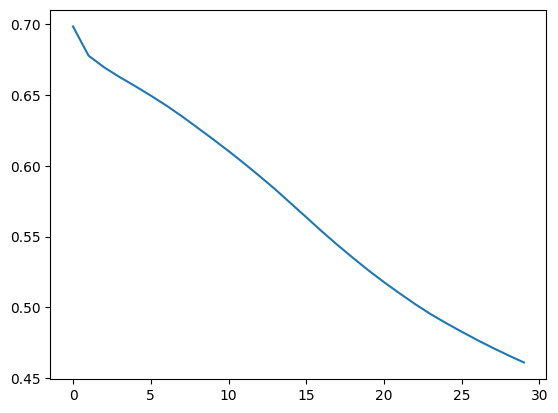

In [66]:
plt.plot(loss)

In [67]:
@torch.no_grad()
def split_loss(split):
    x, y = {'train': (Xtr, Ytr),
            'dev' : (Xdv, Ydv),
            'test': (Xts, Yts)
           }[split]

    Z1 = x @ W1 + b1 
    A1 = torch.relu(Z1)
    logits = torch.sigmoid(A1 @ W2 + b2) 
    loss = F.cross_entropy(logits, y)

    print(loss)

In [68]:
split_loss('train')
split_loss('dev')

tensor(0.4561)
tensor(0.7660)


In [28]:
import torch
import numpy as np

In [3]:
g = torch.Generator().manual_seed(0)

In [32]:
X = torch.randn((2,3),generator=g)
X

tensor([[ 0.4988, -0.5233, -0.2515],
        [-1.0555, -0.5593, -0.1197]])

In [33]:
W = torch.randn((3,4), generator=g)
W

tensor([[-0.1635, -0.2505, -1.0882,  0.0044],
        [ 0.2328, -0.8201, -0.6790,  1.4251],
        [ 1.9647,  0.7678,  1.9899,  0.7183]])

In [34]:
X @ W

tensor([[-0.6975,  0.1112, -0.6879, -0.9242],
        [-0.1928,  0.6311,  1.2902, -0.8876]])

In [35]:
X1 = X.T
X1

tensor([[ 0.4988, -1.0555],
        [-0.5233, -0.5593],
        [-0.2515, -0.1197]])

In [36]:
Z = np.dot(W.T, X1) 
Z

array([[-0.69749224, -0.19275944],
       [ 0.11117558,  0.6311283 ],
       [-0.6878661 ,  1.2901956 ],
       [-0.92420673, -0.8876269 ]], dtype=float32)

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
x = np.random.normal(0, 1, 1000)

(array([ 10.,  27., 101., 183., 227., 209., 158.,  64.,  18.,   3.]),
 array([-2.908732  , -2.29813137, -1.68753073, -1.07693009, -0.46632945,
         0.14427118,  0.75487182,  1.36547246,  1.9760731 ,  2.58667373,
         3.19727437]),
 <BarContainer object of 10 artists>)

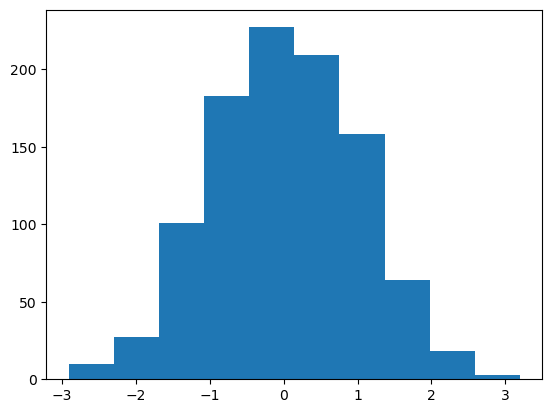

In [9]:
plt.hist(x)

In [10]:
from collections import Counter
def create2files(filename):
    with open(filname, 'r', encoding='utf-8') as f:
        text = f.read()
    text = text.replace('.',' ')
    
    unq_wrds = set(text.split(' '))
    cnt_unq_wrds = Counter(text) 

    with open('fi1e1.txt', 'w') as f:
        f.writelines(unq_wrds)
        f.writelines(cnt_unq_words)

    text2 = f.readlines() 
    unq_words = [len(set(tweet.split(' '))) for tweet in text2]  
    avg_cnt = sum(unq_words) / len(unq_words)

In [14]:
tweets = ['Hi my name is ayan.','The The ball is brown.', 'lettsss gooo.']

unq_words = [len(set(tweet.split(' '))) for tweet in tweets]  
avg_cnt = sum(unq_words) / len(unq_words)

In [15]:
unq_words

[5, 4, 2]

In [16]:
avg_cnt

3.6666666666666665